# Rapport : analyse de données sur les statistiques des meurtres de journalistes dans le monde depuis 1992.

**Auteurs :** 
- [Adrien FROECHLY](https://github.com/AlikakilA)
- [Quentin GROS](https://github.com/quent1grs)
- [Loïc GLANOIS](https://github.com/loicglanoisatynov)

Ce rapport a pu être généré grâce à la base de données récupéré à l'adresse suivante : https://github.com/ali-ce/datasets/blob/master/Journalists-Killed-since-1992/Journalists.csv

## Caractéristiques générales

### Importation des librairies

In [16]:
try:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
except ImportError:
    print("Les librairies nécessaires ne se sont pas importées correctement")
else:
    print("Les librairies ont bien été importées")

Les librairies ont bien été importées


In [18]:
try:
    df = pd.read_csv("Journalists.csv")
except FileNotFoundError:
    print("Le fichier n'a pas été trouvé")
else:
    print("Fichier trouvé.")
    print(df)

Fichier trouvé.
                           Name           Role            Motive   Sex  \
0                    Abay Hailu     Journalist  Motive Confirmed  Male   
1          Abd al-Karim al-Ezzo     Journalist  Motive Confirmed  Male   
2            Abdallah Bouhachek     Journalist  Motive Confirmed  Male   
3     Abdel Aziz Mahmoud Hasoun     Journalist  Motive Confirmed  Male   
4           Abdel Karim al-Oqda     Journalist  Motive Confirmed  Male   
...                         ...            ...               ...   ...   
1575           Unidentified (3)  Media Workers               NaN   NaN   
1576           Unidentified (4)  Media Workers               NaN   NaN   
1577            Waqas Aziz Khan  Media Workers               NaN   NaN   
1578              Yasser Khatab  Media Workers               NaN   NaN   
1579         Ziad Tarek al-Dibo  Media Workers               NaN   NaN   

             Date Killed Year of Death Month of Death Country Killed  \
0      February  9, 199

In [53]:
try:
    num_of_rows = df.shape[0]
    print("La base de données contient", num_of_rows, "entrées.")
except AttributeError:
    print("Erreur lors du calcul du nombre de lignes")

La base de données contient 1580 lignes.


### Représentation quantitative des journalistes tués dans le cadre de leur travail entre 1992 et 2014.

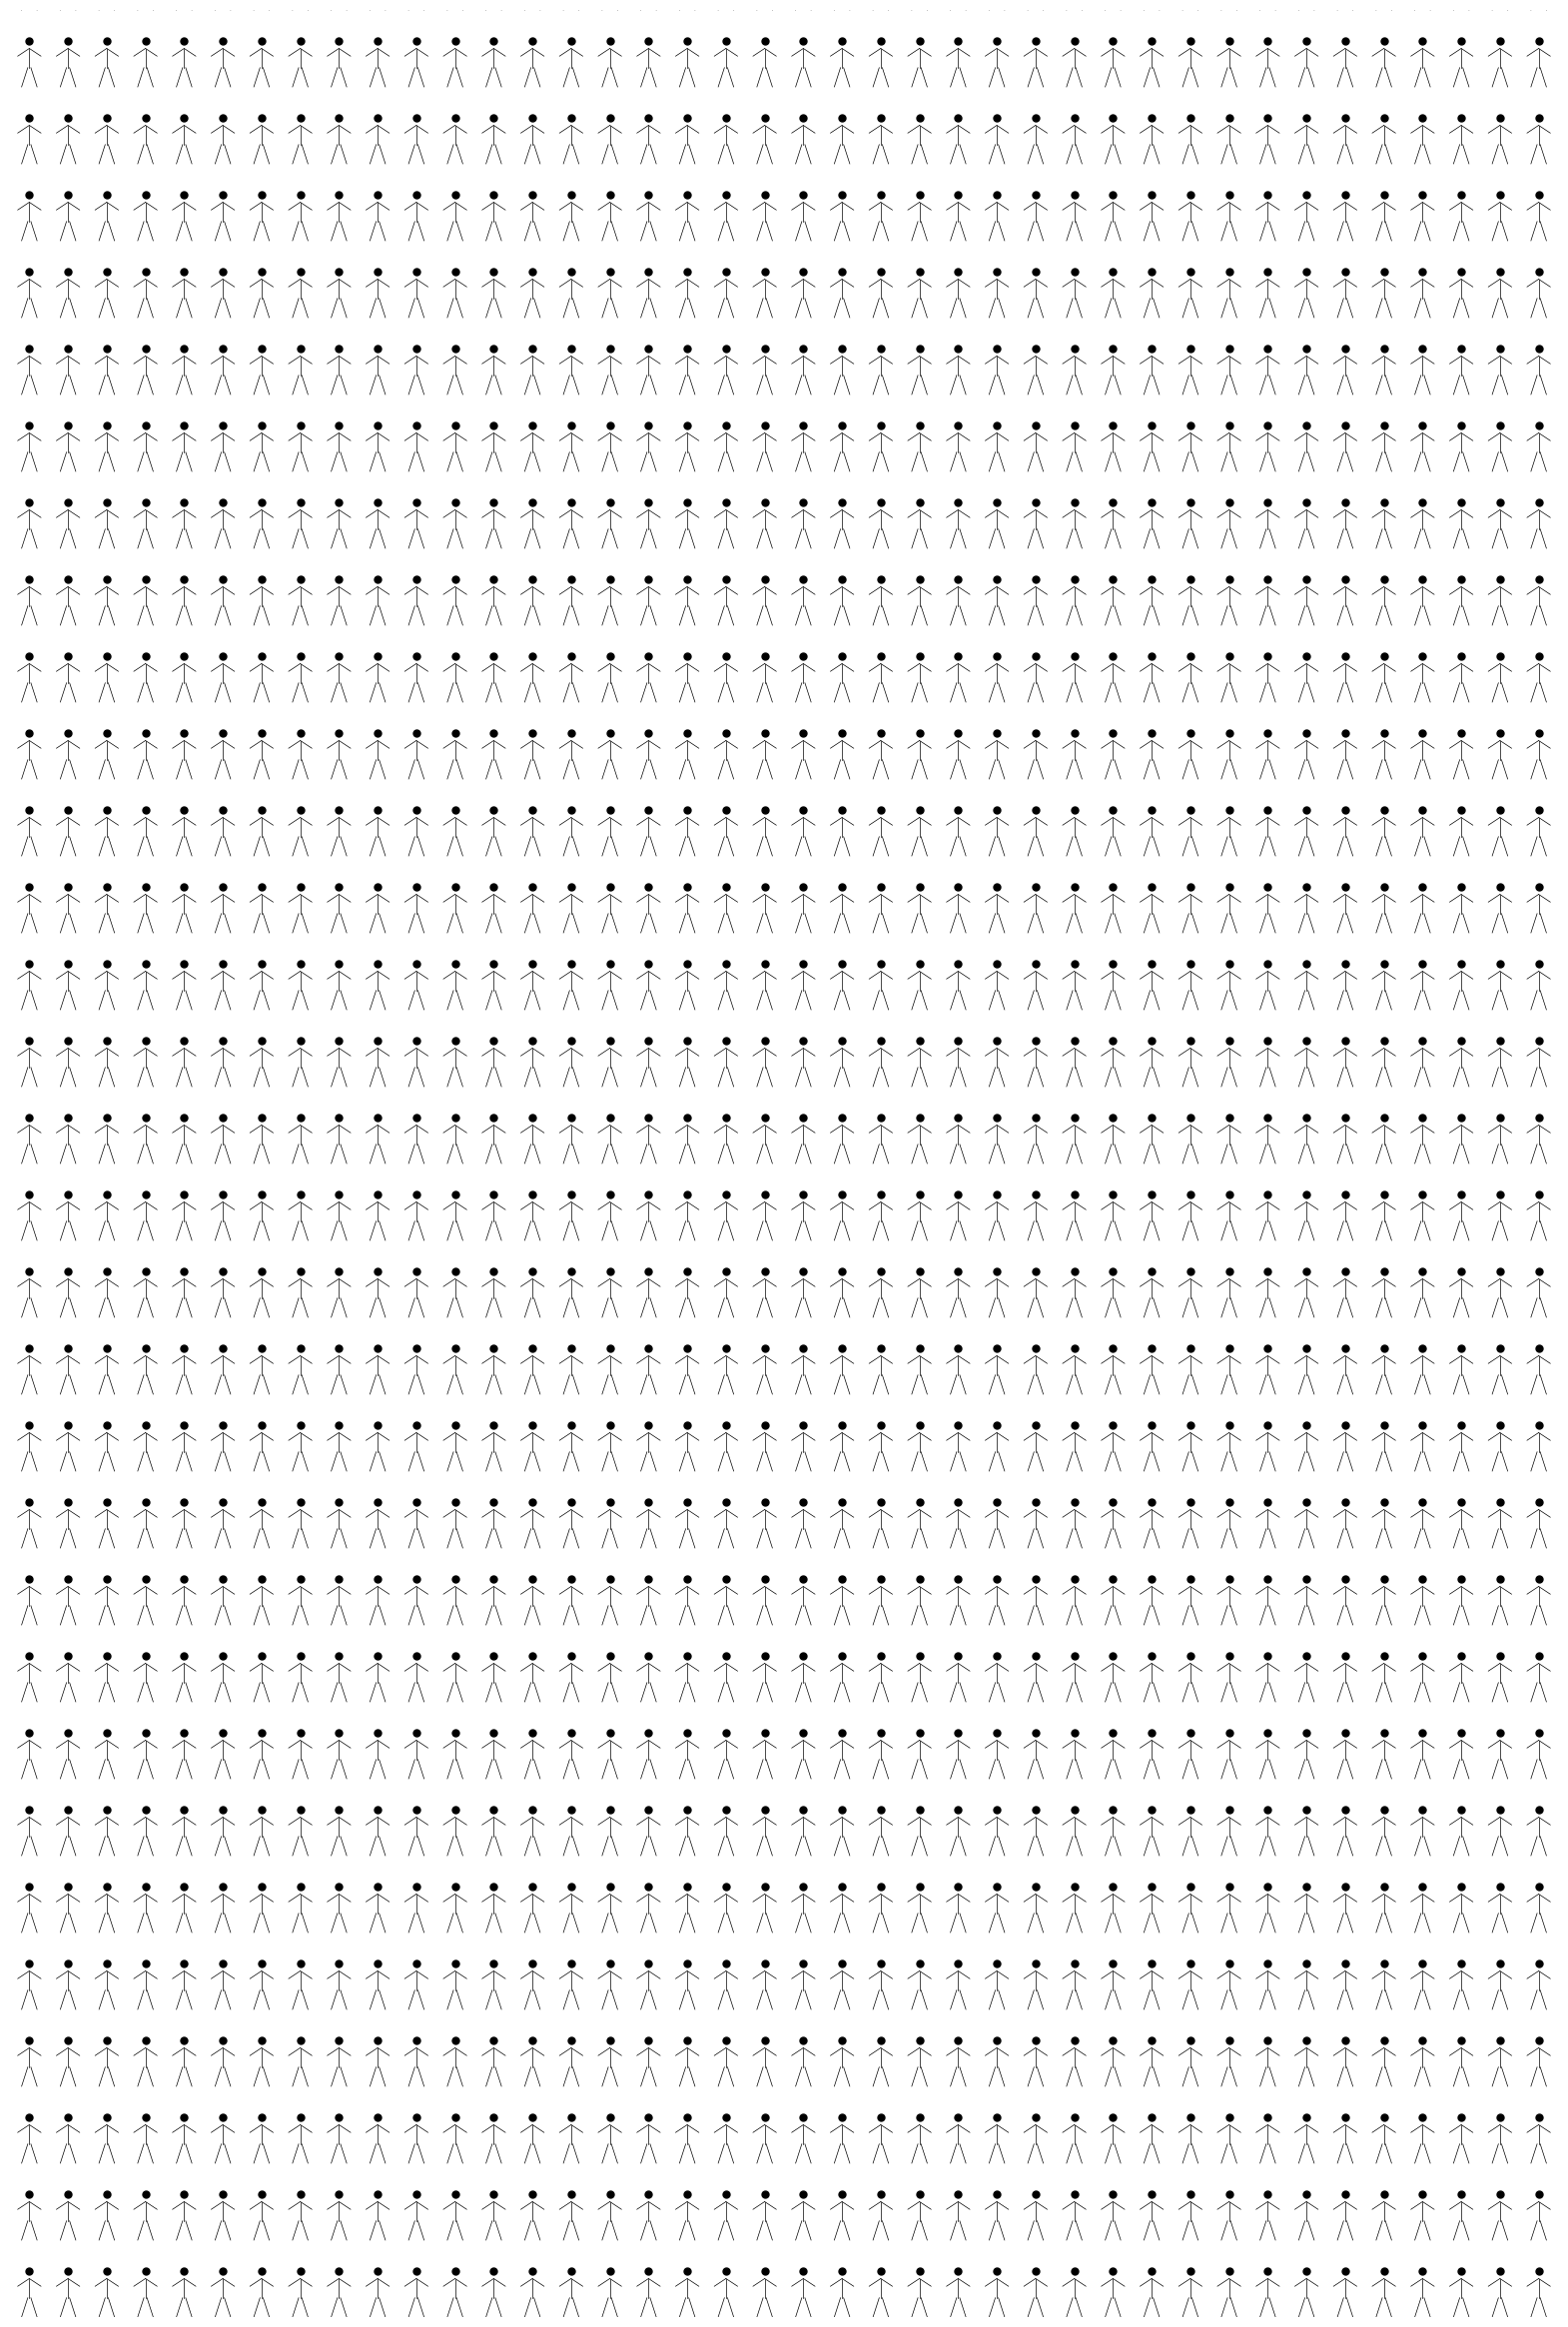

In [54]:
try:
    nb_petits_bonhommes = num_of_rows

    # Créez une figure pour la visualisation
    fig, ax = plt.subplots(figsize=(20, 30))

    # Boucle pour dessiner chaque "petit bonhomme"
    for i in range(nb_petits_bonhommes):
        # Calculez la position du "petit bonhomme" en fonction de sa position dans la liste
        x = (i % 40) * 0.5  # 40 "petits bonhommes" par ligne
        y = (i // 40) * 2.0  # Les lignes sont espacées de 2 unités
        
        # Dessine la tête
        plt.plot(x + 0.25, y + 1.2, marker='o', markersize=5, color='black')
        
        # Dessine le corps
        plt.plot([x + 0.25, x + 0.25], [y + 1.0, y + 0.5], color='black', lw=0.5)
        
        # Dessine les bras
        plt.plot([x + 0.25, x + 0.1], [y + 1.0, y + 0.8], color='black', lw=0.5)
        plt.plot([x + 0.25, x + 0.4], [y + 1.0, y + 0.8], color='black', lw=0.5)
        
        # Dessine les jambes
        plt.plot([x + 0.23, x + 0.15], [y + 0.5, y + 0.0], color='black', lw=0.5)
        plt.plot([x + 0.27, x + 0.35], [y + 0.5, y + 0.0], color='black', lw=0.5)

    # Définissez les limites de l'axe pour que tous les "petits bonhommes" soient visibles
    plt.xlim(0, 20)
    plt.ylim(0, 60)

    # Cachez les axes pour une visualisation plus clean
    plt.axis('off')

    # Affichez la figure
    plt.show()
except:
    print("Erreur lors de la visualisation des données")

### Part des journalistes dont le motif de la mort est connu.

% de confirmation du motif : 94.49%


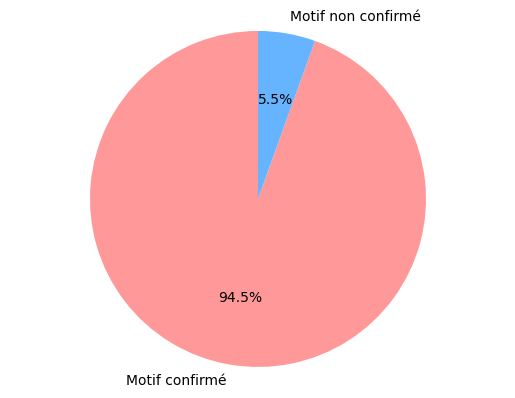

In [55]:
try: 
    # Calculer le pourcentage de confirmation du motif
    motif_confirme = df['Motive'].notna().sum()
    pourcentage_confirmation_motif = (motif_confirme / num_of_rows) * 100
    print(f"% de confirmation du motif : {pourcentage_confirmation_motif:.2f}%")

    # Représenter sous forme de camembert
    labels = ['Motif confirmé', 'Motif non confirmé']
    sizes = [motif_confirme, num_of_rows - motif_confirme]
    colors = ['#ff9999','#66b3ff']
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
    ax1.axis('equal')
    plt.show()
except:
    print("Erreur lors du calcul du pourcentage d'hommes et de femmes")


### Répartition des hommes et des femmes parmi les journalistes tués.

% d'hommes : 86.77%
% de femmes : 5.89%


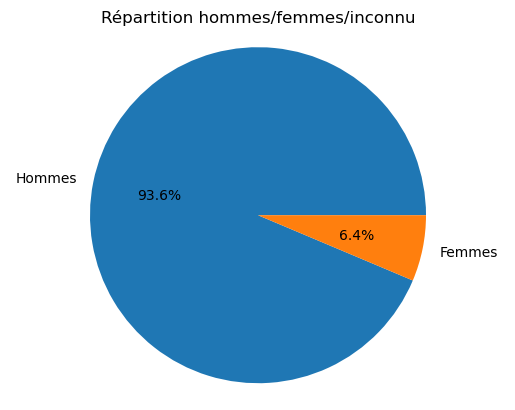

In [56]:
try:
    # Calculer le pourcentage d'hommes et de femmes
    hommes = df['Sex'] == 'Male'
    femmes = df['Sex'] == 'Female'
    pourcentage_hommes = (hommes.sum() / num_of_rows) * 100
    pourcentage_femmes = (femmes.sum() / num_of_rows) * 100
    print(f"% d'hommes : {pourcentage_hommes:.2f}%")
    print(f"% de femmes : {pourcentage_femmes:.2f}%")


    plt.pie([pourcentage_hommes, pourcentage_femmes], labels=['Hommes', 'Femmes'], autopct='%1.1f%%')
    plt.title('Répartition hommes/femmes/inconnu')
    plt.axis('equal')  # Pour que le camembert soit circulaire
    plt.show()
except:
    print("Erreur lors du calcul du pourcentage d'hommes et de femmes")

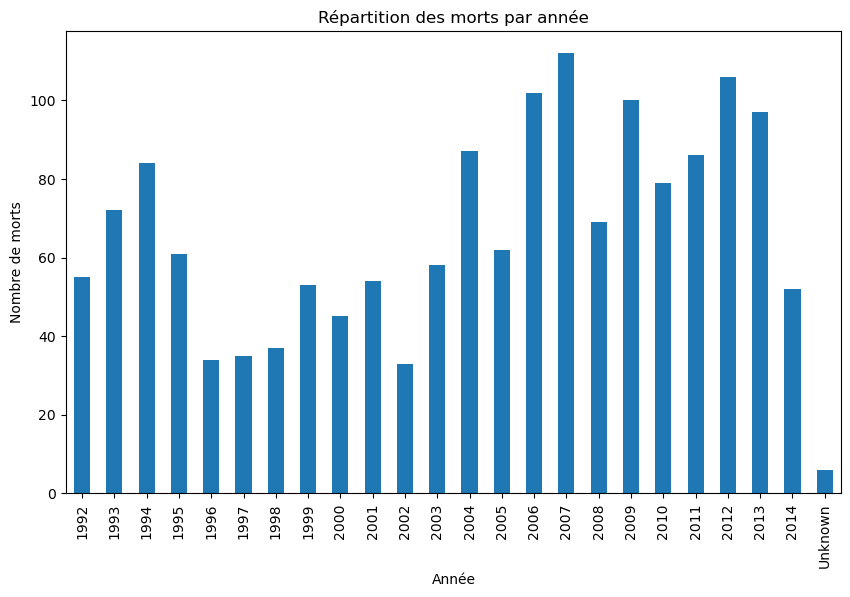

In [57]:
try:
    # Calculer la répartition des morts par année
    morts_par_annee = df['Year of Death'].value_counts().sort_index()
    plt.figure(figsize=(10, 6))
    morts_par_annee.plot(kind='bar')
    plt.title("Répartition des morts par année")
    plt.xlabel("Année")
    plt.ylabel("Nombre de morts")
    plt.show()
except:
    print("Erreur lors de la répartition des morts par année")

In [22]:
# Récupère les noms des colonnes
try:
    columns = df.columns
    print("Les colonnes de la base de données sont : " + str(columns))
except AttributeError:
    print("Erreur lors de la récupération des colonnes")

Les colonnes de la base de données sont : Index(['Name', 'Role', 'Motive', 'Sex', 'Date Killed', 'Year of Death',
       'Month of Death', 'Country Killed', 'Organization', 'Nationality',
       'Medium', 'Job', 'Coverage', 'Freelance', 'Local/Foreign',
       'Source of Fire', 'Type of Death', 'Impunity (for Murder)',
       'Taken Captive', 'Threatened', 'Tortured', 'Profile on CPJ', 'Image',
       'Description'],
      dtype='object')


In [58]:
try:
    month_map = {
        'January': '01', 'February': '02', 'March': '03', 'April': '04',
        'May': '05', 'June': '06', 'July': '07', 'August': '08',
        'September': '09', 'October': '10', 'November': '11', 'December': '12'
    }
    
    df_latest = df.loc[df['Year of Death'].idxmax()]
    row = df_latest
    print("L'entrée la plus récente correspond à " + row['Name'] + ", tué le " + row['Date Killed'] + " en " + str(row['Country Killed'] + "."))
except KeyError:
    print("Erreur lors de la récupération des dates de décès")

TypeError: '>' not supported between instances of 'float' and 'str'

La fonction précédente indique que la dernière entrée dans le fichier date de juin 2014, et qu'on ne dispose pas des des chiffres du reste de l'année.

### Motif De la Mort Confimé

In [33]:
motif_confirme = df['Motive'].notna().sum()
pourcentage_confirmation_motif = (motif_confirme / effectif_echantillon) * 100
print(f"% de confirmation du motif : {pourcentage_confirmation_motif:.2f}%")


% de confirmation du motif : 94.49%


### Pourcentages D'homme / Femmes Tué(e)s

% d'hommes : 86.77%
% de femmes : 5.89%


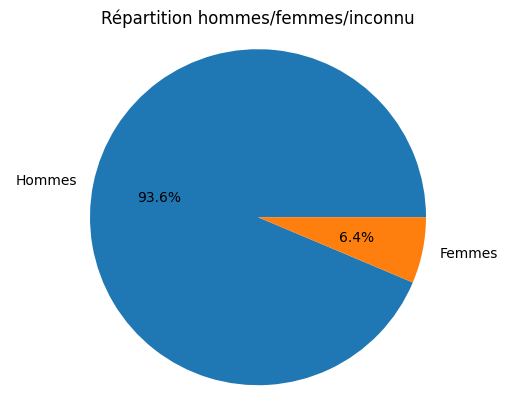

In [35]:
hommes = df['Sex'] == 'Male'
femmes = df['Sex'] == 'Female'
pourcentage_hommes = (hommes.sum() / effectif_echantillon) * 100
pourcentage_femmes = (femmes.sum() / effectif_echantillon) * 100
print(f"% d'hommes : {pourcentage_hommes:.2f}%")
print(f"% de femmes : {pourcentage_femmes:.2f}%")
plt.pie([pourcentage_hommes, pourcentage_femmes], labels=['Hommes', 'Femmes'], autopct='%1.1f%%')
plt.title('Répartition hommes/femmes/inconnu')
plt.axis('equal')  
plt.show()

# Pourcentages des journalistes tués dans leur pays de nationalité

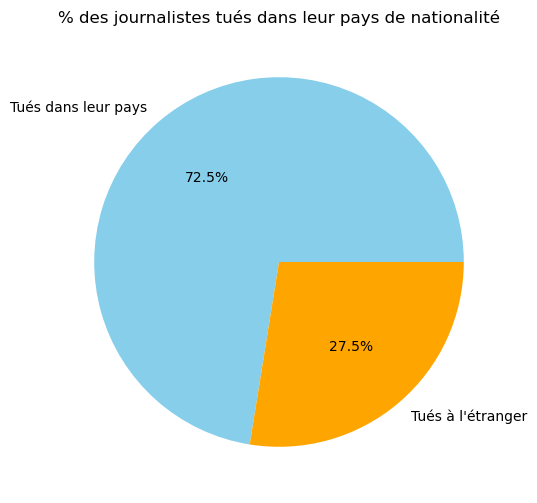

In [61]:
try :
    plt.figure(figsize=(6, 6))
    local_killed = df['Country Killed'] == df['Nationality']
    local_count = local_killed.sum()
    foreign_count = len(df) - local_count
    plt.pie([local_count, foreign_count], labels=["Tués dans leur pays", "Tués à l'étranger"], autopct='%1.1f%%', colors=['skyblue', 'orange'])
    plt.title("% des journalistes tués dans leur pays de nationalité")
    plt.show()
except KeyError:
    print("Erreur lors de la récupération des données pour le graphique")

La majorité des journalistes sont tués dans leur pays de nationalité, illustrant une tendance liée à des conflits ou tensions internes.

### Médias les plus représentés

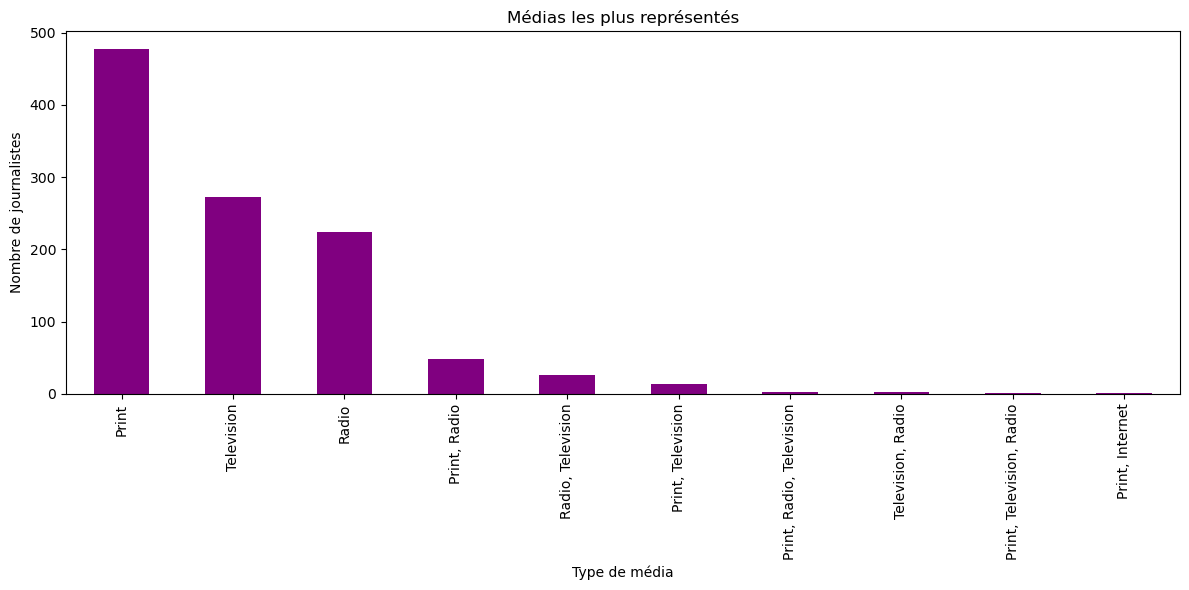

In [62]:
try:
    plt.figure(figsize=(12, 6))
    media_counts = df['Medium'].value_counts().head(10)
    media_counts.plot(kind='bar', color='purple')
    plt.title("Médias les plus représentés")
    plt.xlabel("Type de média")
    plt.ylabel("Nombre de journalistes")
    plt.tight_layout()
    plt.show()
except KeyError:
    print("Erreur lors de la récupération des données pour le graphique")

Les journalistes issus des médias imprimés et de la radio sont les plus touchés, suivis par la télévision.

### Part des différentes professions

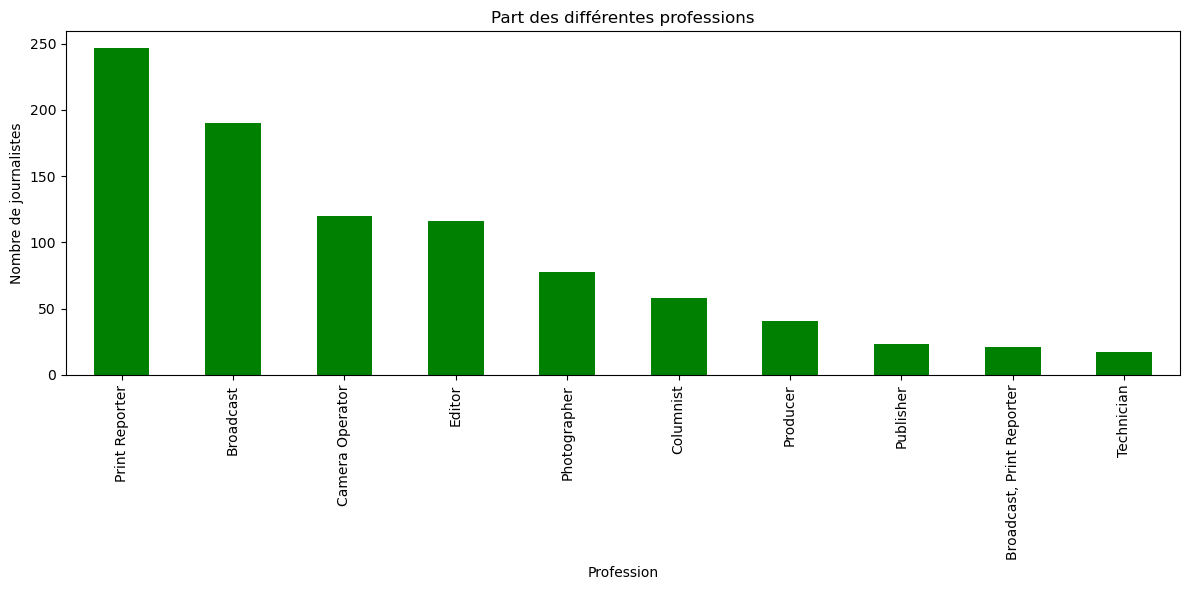

In [63]:
try:
    plt.figure(figsize=(12, 6))
    job_counts = df['Job'].value_counts().head(10)
    job_counts.plot(kind='bar', color='green')
    plt.title("Part des différentes professions")
    plt.xlabel("Profession")
    plt.ylabel("Nombre de journalistes")
    plt.tight_layout()
    plt.show()
except KeyError:
    print("Erreur lors de la récupération des données pour le graphique")

Les reporters et éditeurs représentent les professions les plus vulnérables, suivis des photographes et caméramans.

## Analyse des données

### Part des journalistes spécialisés dans les droits humains et l'anticorruption

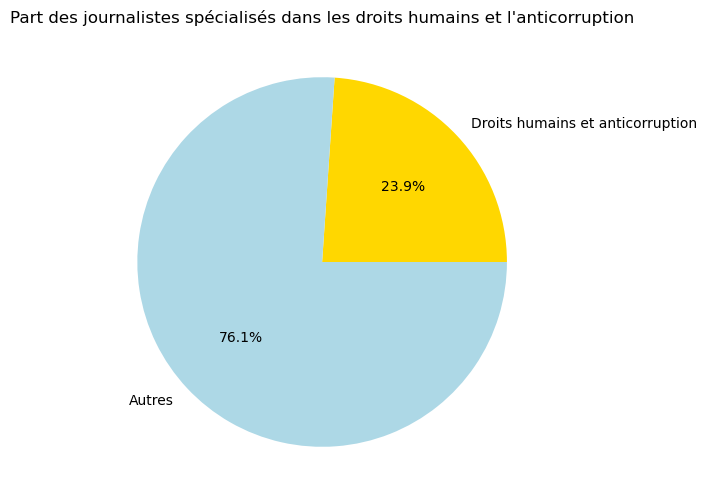

In [65]:
try:
    plt.figure(figsize=(6, 6))
    specialties = df['Coverage'].dropna().str.contains("Human Rights|Corruption", case=False, na=False)
    specialty_count = specialties.sum()
    non_specialty_count = len(df) - specialty_count
    plt.pie([specialty_count, non_specialty_count], labels=["Droits humains et anticorruption", "Autres"], autopct='%1.1f%%', colors=['gold', 'lightblue'])
    plt.title("Part des journalistes spécialisés dans les droits humains et l'anticorruption")
    plt.show()
except KeyError:
    print("Erreur lors de la récupération des données pour le graphique")

Une proportion significative des journalistes tués couvraient les droits humains et l'anticorruption, mettant en lumière leur exposition à des risques élevés dans ces domaines sensibles.

### Qui s'en prend aux journalistes ?

Le fichier donne des précisions sur la nature du groupe ayant causé la mort de chaque journaliste. La colonne correspondante est la colonne "Source of Fire".

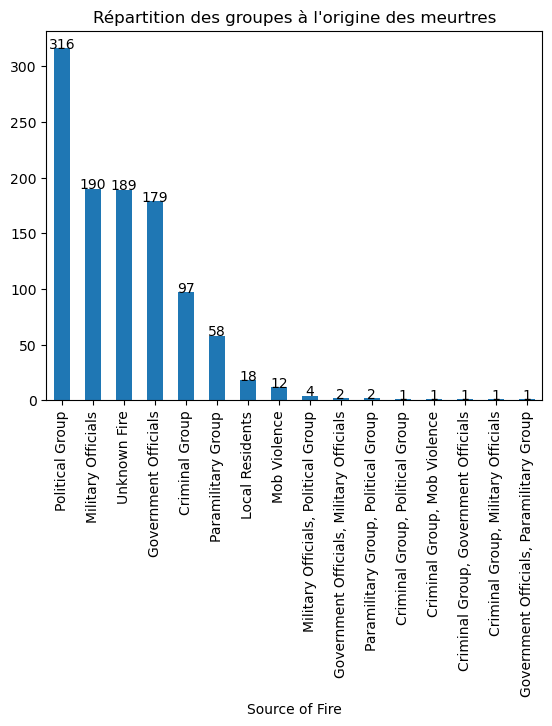

In [ ]:
# Relit le fichier pour éviter les erreurs de lecture
try:
    df = pd.read_csv("Journalists.csv")
except FileNotFoundError:
    print("Erreur")

# Graph sur la répartition de la nature des groupes à l'origine des meurtres. Trie les différents résultats dans la colonne "Source of Fire" et les affiche dans un graphique.
try:
    df['Source of Fire'].value_counts().plot(kind='bar')
    plt.title("Répartition des groupes à l'origine des meurtres")
    for i, v in enumerate(df['Source of Fire'].value_counts()):
        plt.text(i, v, str(v), ha='center')
    plt.show()
except KeyError:
    print("Erreur lors de la récupération des données pour le graphique")

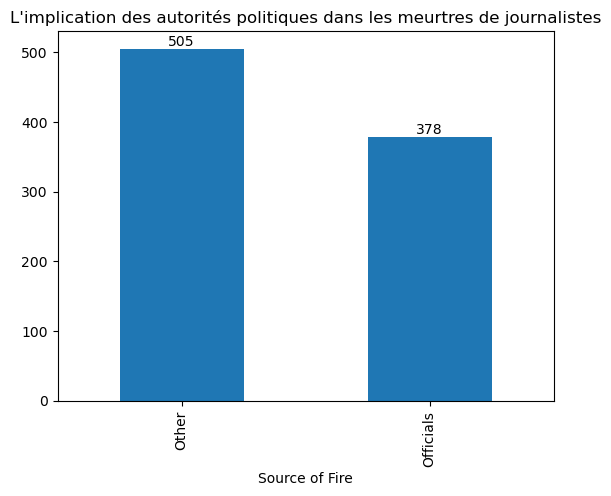

In [ ]:
try:
    df = pd.read_csv("Journalists.csv")
except FileNotFoundError:
    print("Erreur")

try:
    # Filtrer d'abord pour exclure "Unknown Fire" et les valeurs NaN
    df_filtered = df[df['Source of Fire'].notna()]
    df_filtered = df_filtered[df_filtered['Source of Fire'] != 'Unknown Fire']
    
    # Créer les catégories Officials/Other
    mask = df_filtered['Source of Fire'].str.contains('Military Officials|Government Officials', na=False)
    df_filtered.loc[mask, 'Source of Fire'] = 'Officials'
    df_filtered.loc[~mask, 'Source of Fire'] = 'Other'
    
    # Créer le graphique
    ax = df_filtered['Source of Fire'].value_counts().plot(kind='bar')
    plt.title("L'implication des autorités politiques dans les meurtres de journalistes")
    
    # Ajouter les valeurs sur chaque barre
    for i in ax.containers:
        ax.bar_label(i)
    
    plt.show()
except KeyError:
    print("Erreur lors de la récupération des données pour le graphique")

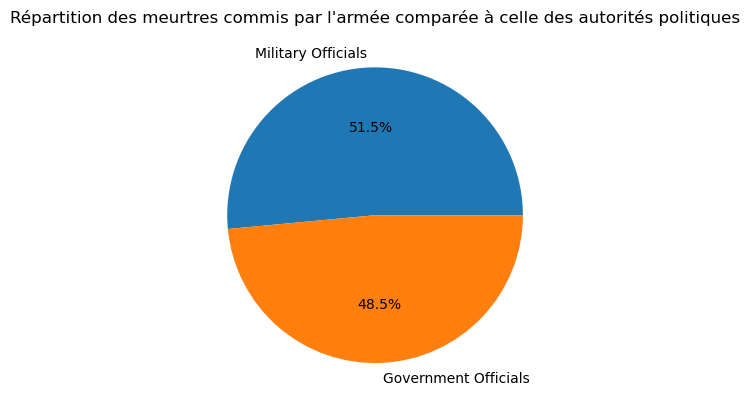

In [59]:
try:
    # Filtrer pour inclure uniquement "Military Officials" et "Government Officials" purs
    df_filtered = df[df['Source of Fire'].notna()]
    df_filtered = df_filtered[
        (df_filtered['Source of Fire'] == 'Military Officials') | 
        (df_filtered['Source of Fire'] == 'Government Officials')
    ]

    # Créer le graphique en camembert
    ax = df_filtered['Source of Fire'].value_counts().plot(kind='pie', autopct='%1.1f%%')
    
    plt.title("Répartition des meurtres commis par l'armée comparée à celle des autorités politiques")
    plt.ylabel('')  # Retire le label 'count'
    plt.show()
except KeyError:
    print("Erreur lors de la récupération des données pour le graphique")


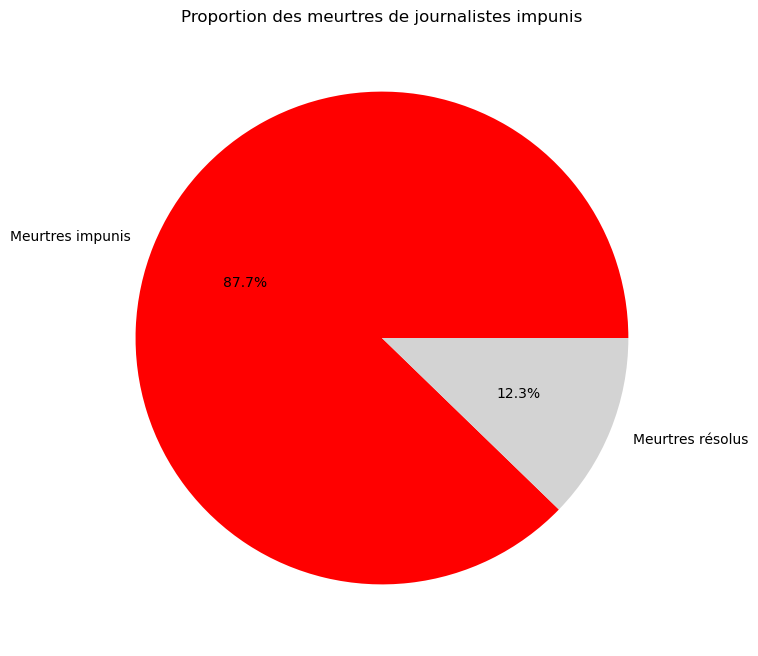

Pourcentage de meurtres impunis : 87.7%


In [67]:
# Calcul du pourcentage de meurtres impunis (colonne 'Impunity (for Murder)')
# Compter les meurtres impunis
impunity_count = df['Impunity (for Murder)'].value_counts()['Yes']
total_murders = df['Impunity (for Murder)'].notna().sum()
pourcentage_impunity = (impunity_count / total_murders) * 100

# Création du graphique en camembert
plt.figure(figsize=(8, 8))
plt.pie([impunity_count, total_murders - impunity_count], 
    labels=['Meurtres impunis', 'Meurtres résolus'],
    autopct='%1.1f%%',
    colors=['red', 'lightgray'])
plt.title('Proportion des meurtres de journalistes impunis')
plt.show()

print(f"Pourcentage de meurtres impunis : {pourcentage_impunity:.1f}%")


### Part de journalistes enlevés avant leur mort

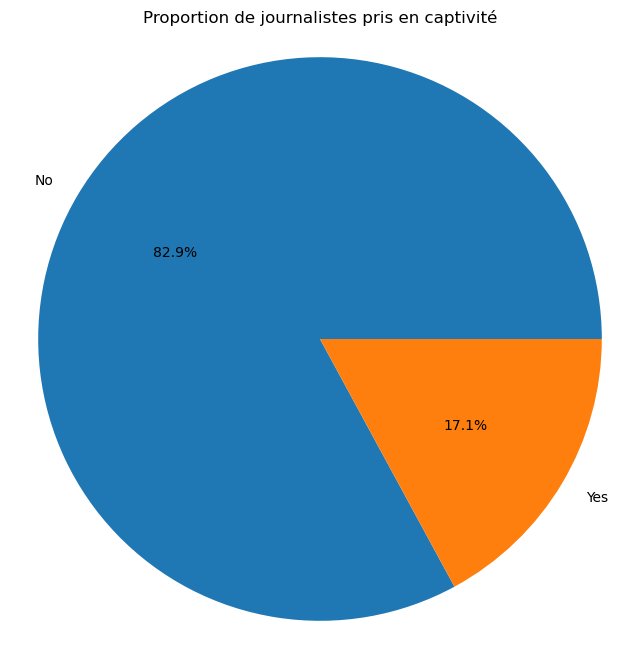

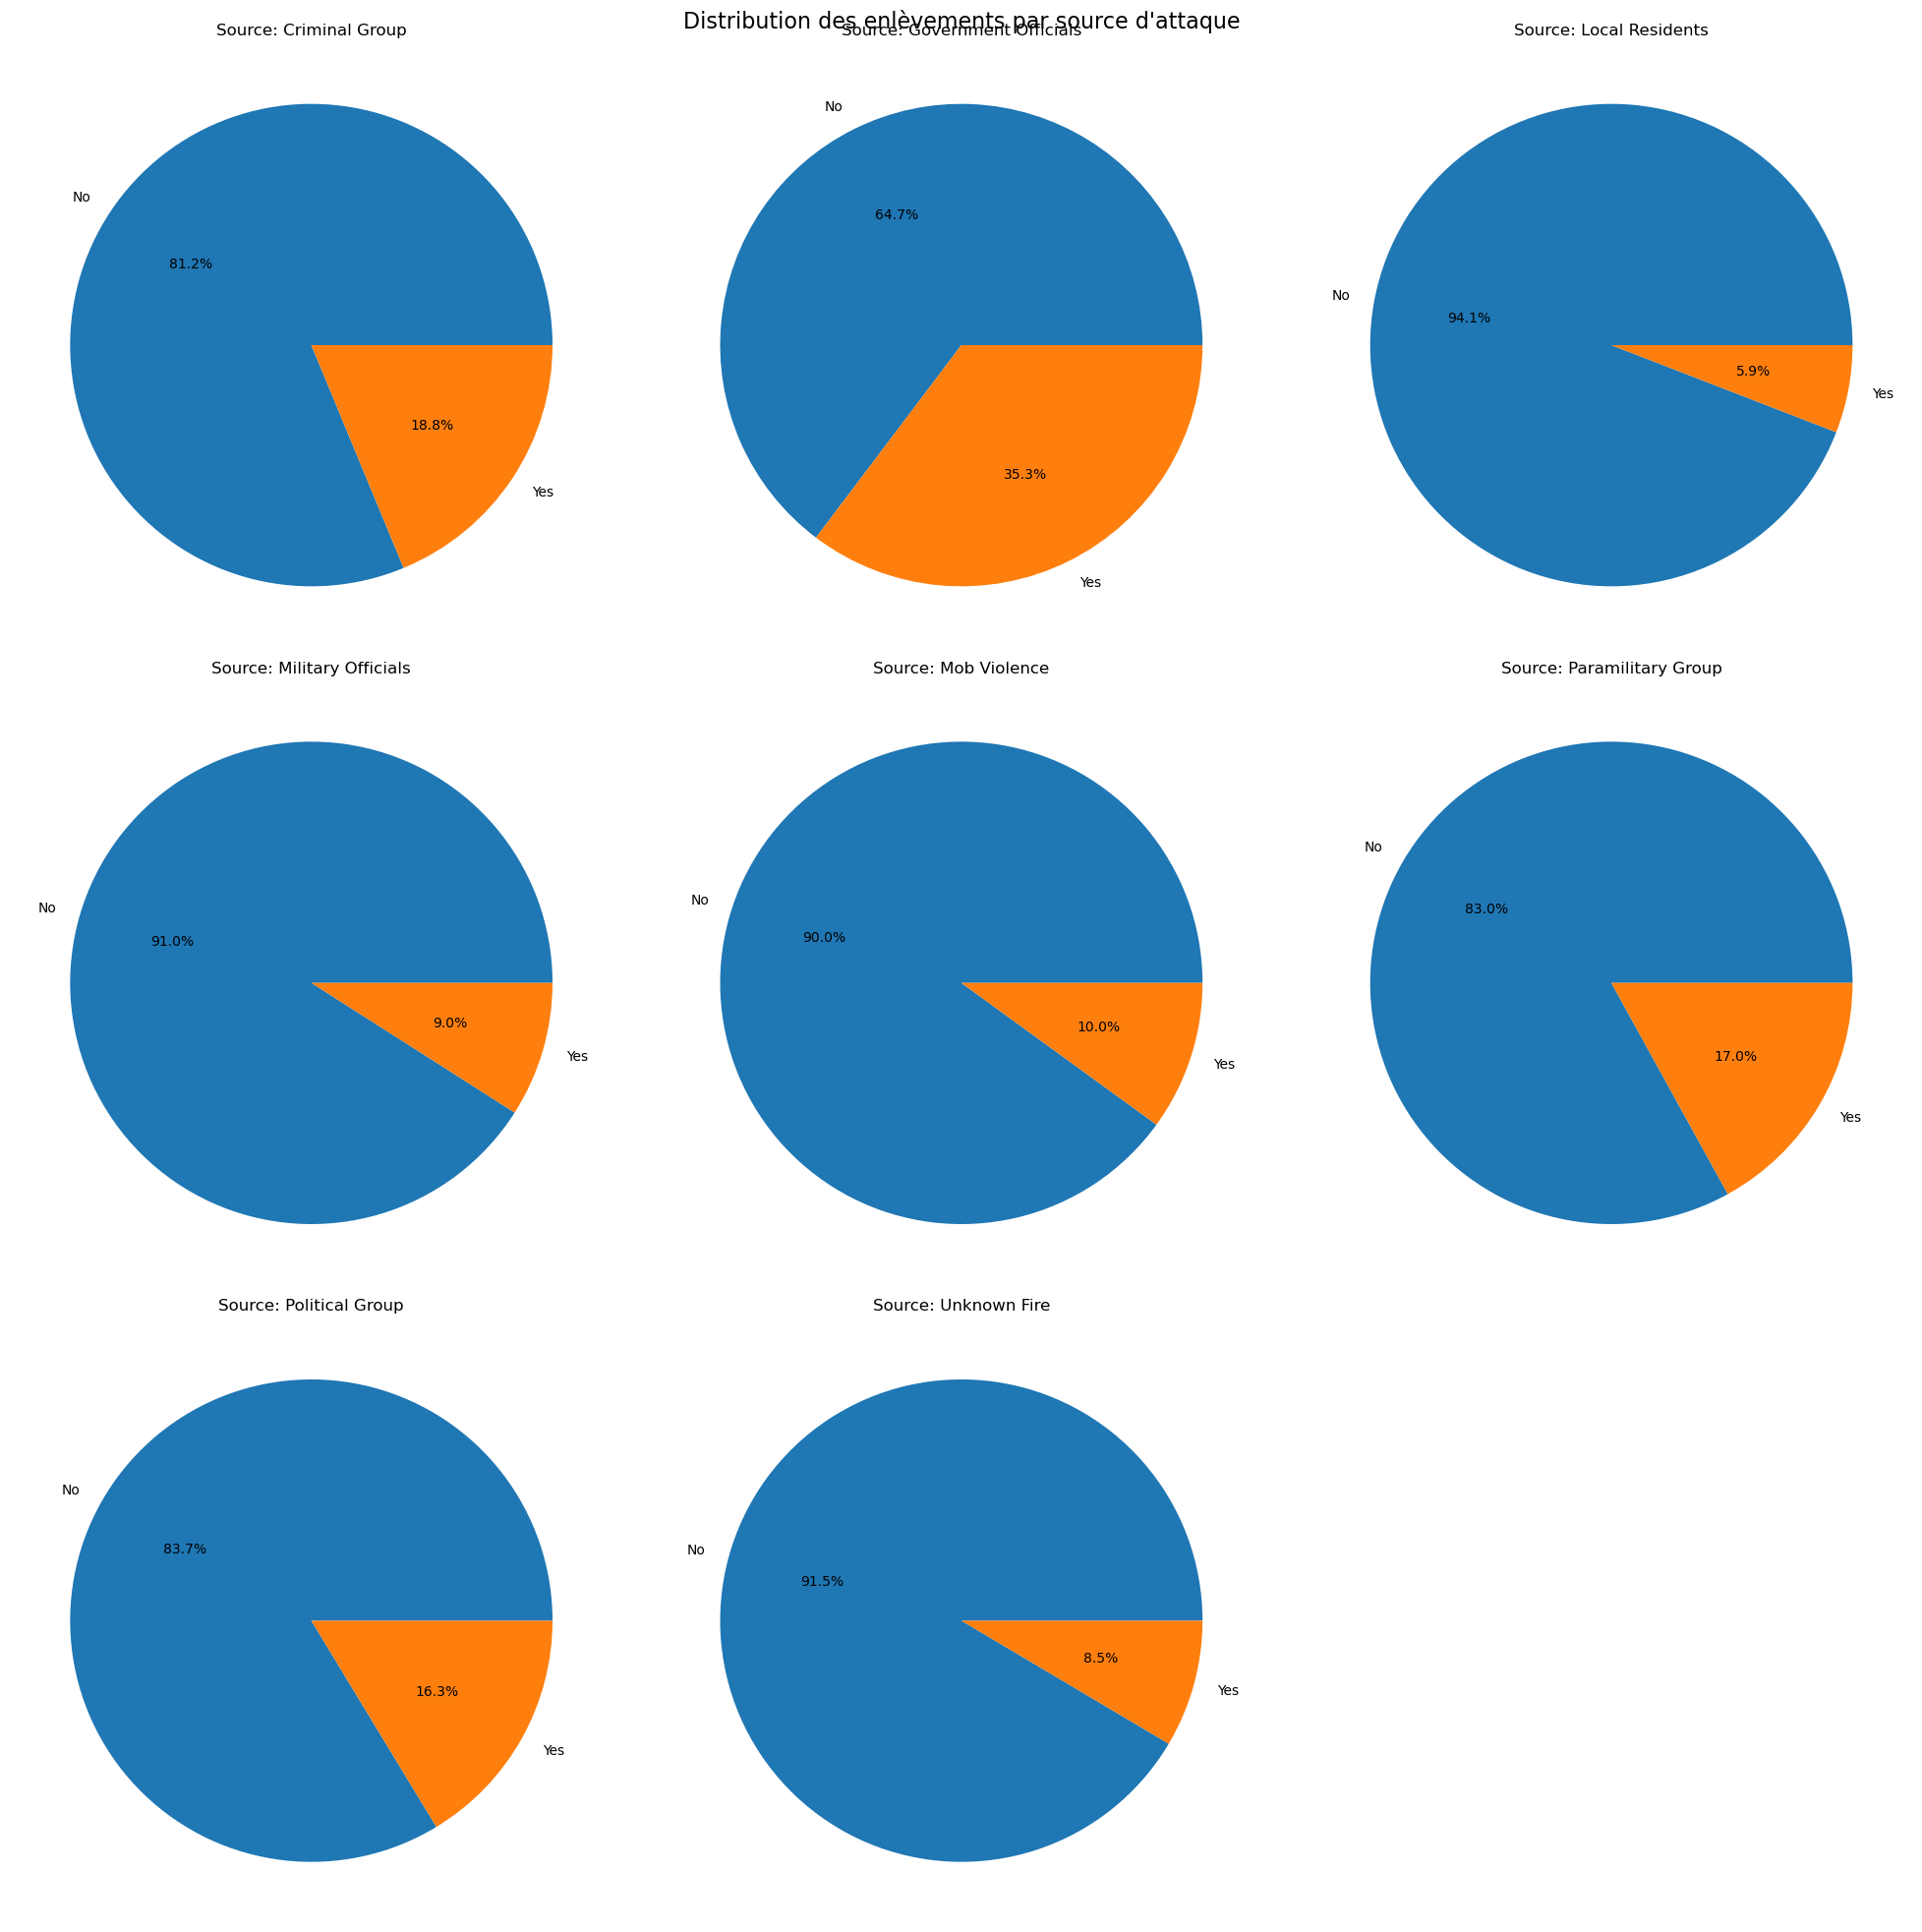

In [72]:
# Quelle part de journalistes sont 'Taken Native' 
# Count instances of journalists being taken captive
captive_data = df['Taken Captive'].value_counts()

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(captive_data, labels=captive_data.index, autopct='%1.1f%%')
plt.title('Proportion de journalistes pris en captivité')
plt.axis('equal')
plt.show()

# Faire ce même diagramme, pour chaque groupe distinct dans la colonne 'Source of Fire'
# Exclure les sources contenant une virgule
source_fire_captive = pd.crosstab(df['Source of Fire'], df['Taken Captive'])
source_fire_filtered = source_fire_captive[~source_fire_captive.index.str.contains(',')]

# Create a figure with subplots
num_sources = len(source_fire_filtered)
rows = int(np.ceil(np.sqrt(num_sources)))
cols = rows
fig, axes = plt.subplots(rows, cols, figsize=(20, 20))
axes = axes.ravel()

# Create pie charts for each source of fire
for idx, (source, data) in enumerate(source_fire_filtered.iterrows()):
    if idx < len(axes):  # Limit to prevent index out of bounds
        axes[idx].pie(data, labels=['No', 'Yes'], autopct='%1.1f%%')
        axes[idx].set_title(f'Source: {source}')

# Remove empty subplots if any
for idx in range(len(source_fire_filtered), len(axes)):
    fig.delaxes(axes[idx])

plt.suptitle('Distribution des enlèvements par source d\'attaque', fontsize=16)
plt.tight_layout()
plt.show()

Les diagrammes ci-dessus indiquent une forte proportion de journalistes enlevés par des autorités gouvernementales, ce qui est une inclinaison partagée par les groupes politiques, les groupes paramilitaires et les groupes criminels.

### Part de journalistes qui ont subi de la torture avant leur mort

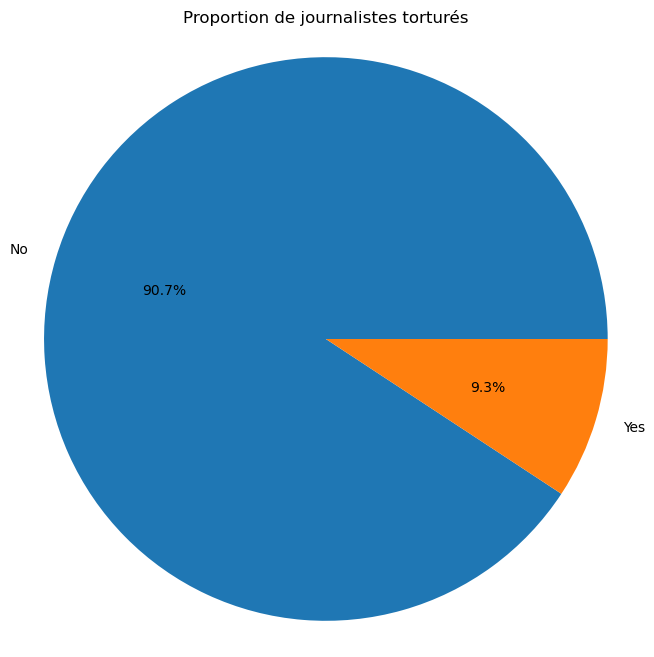

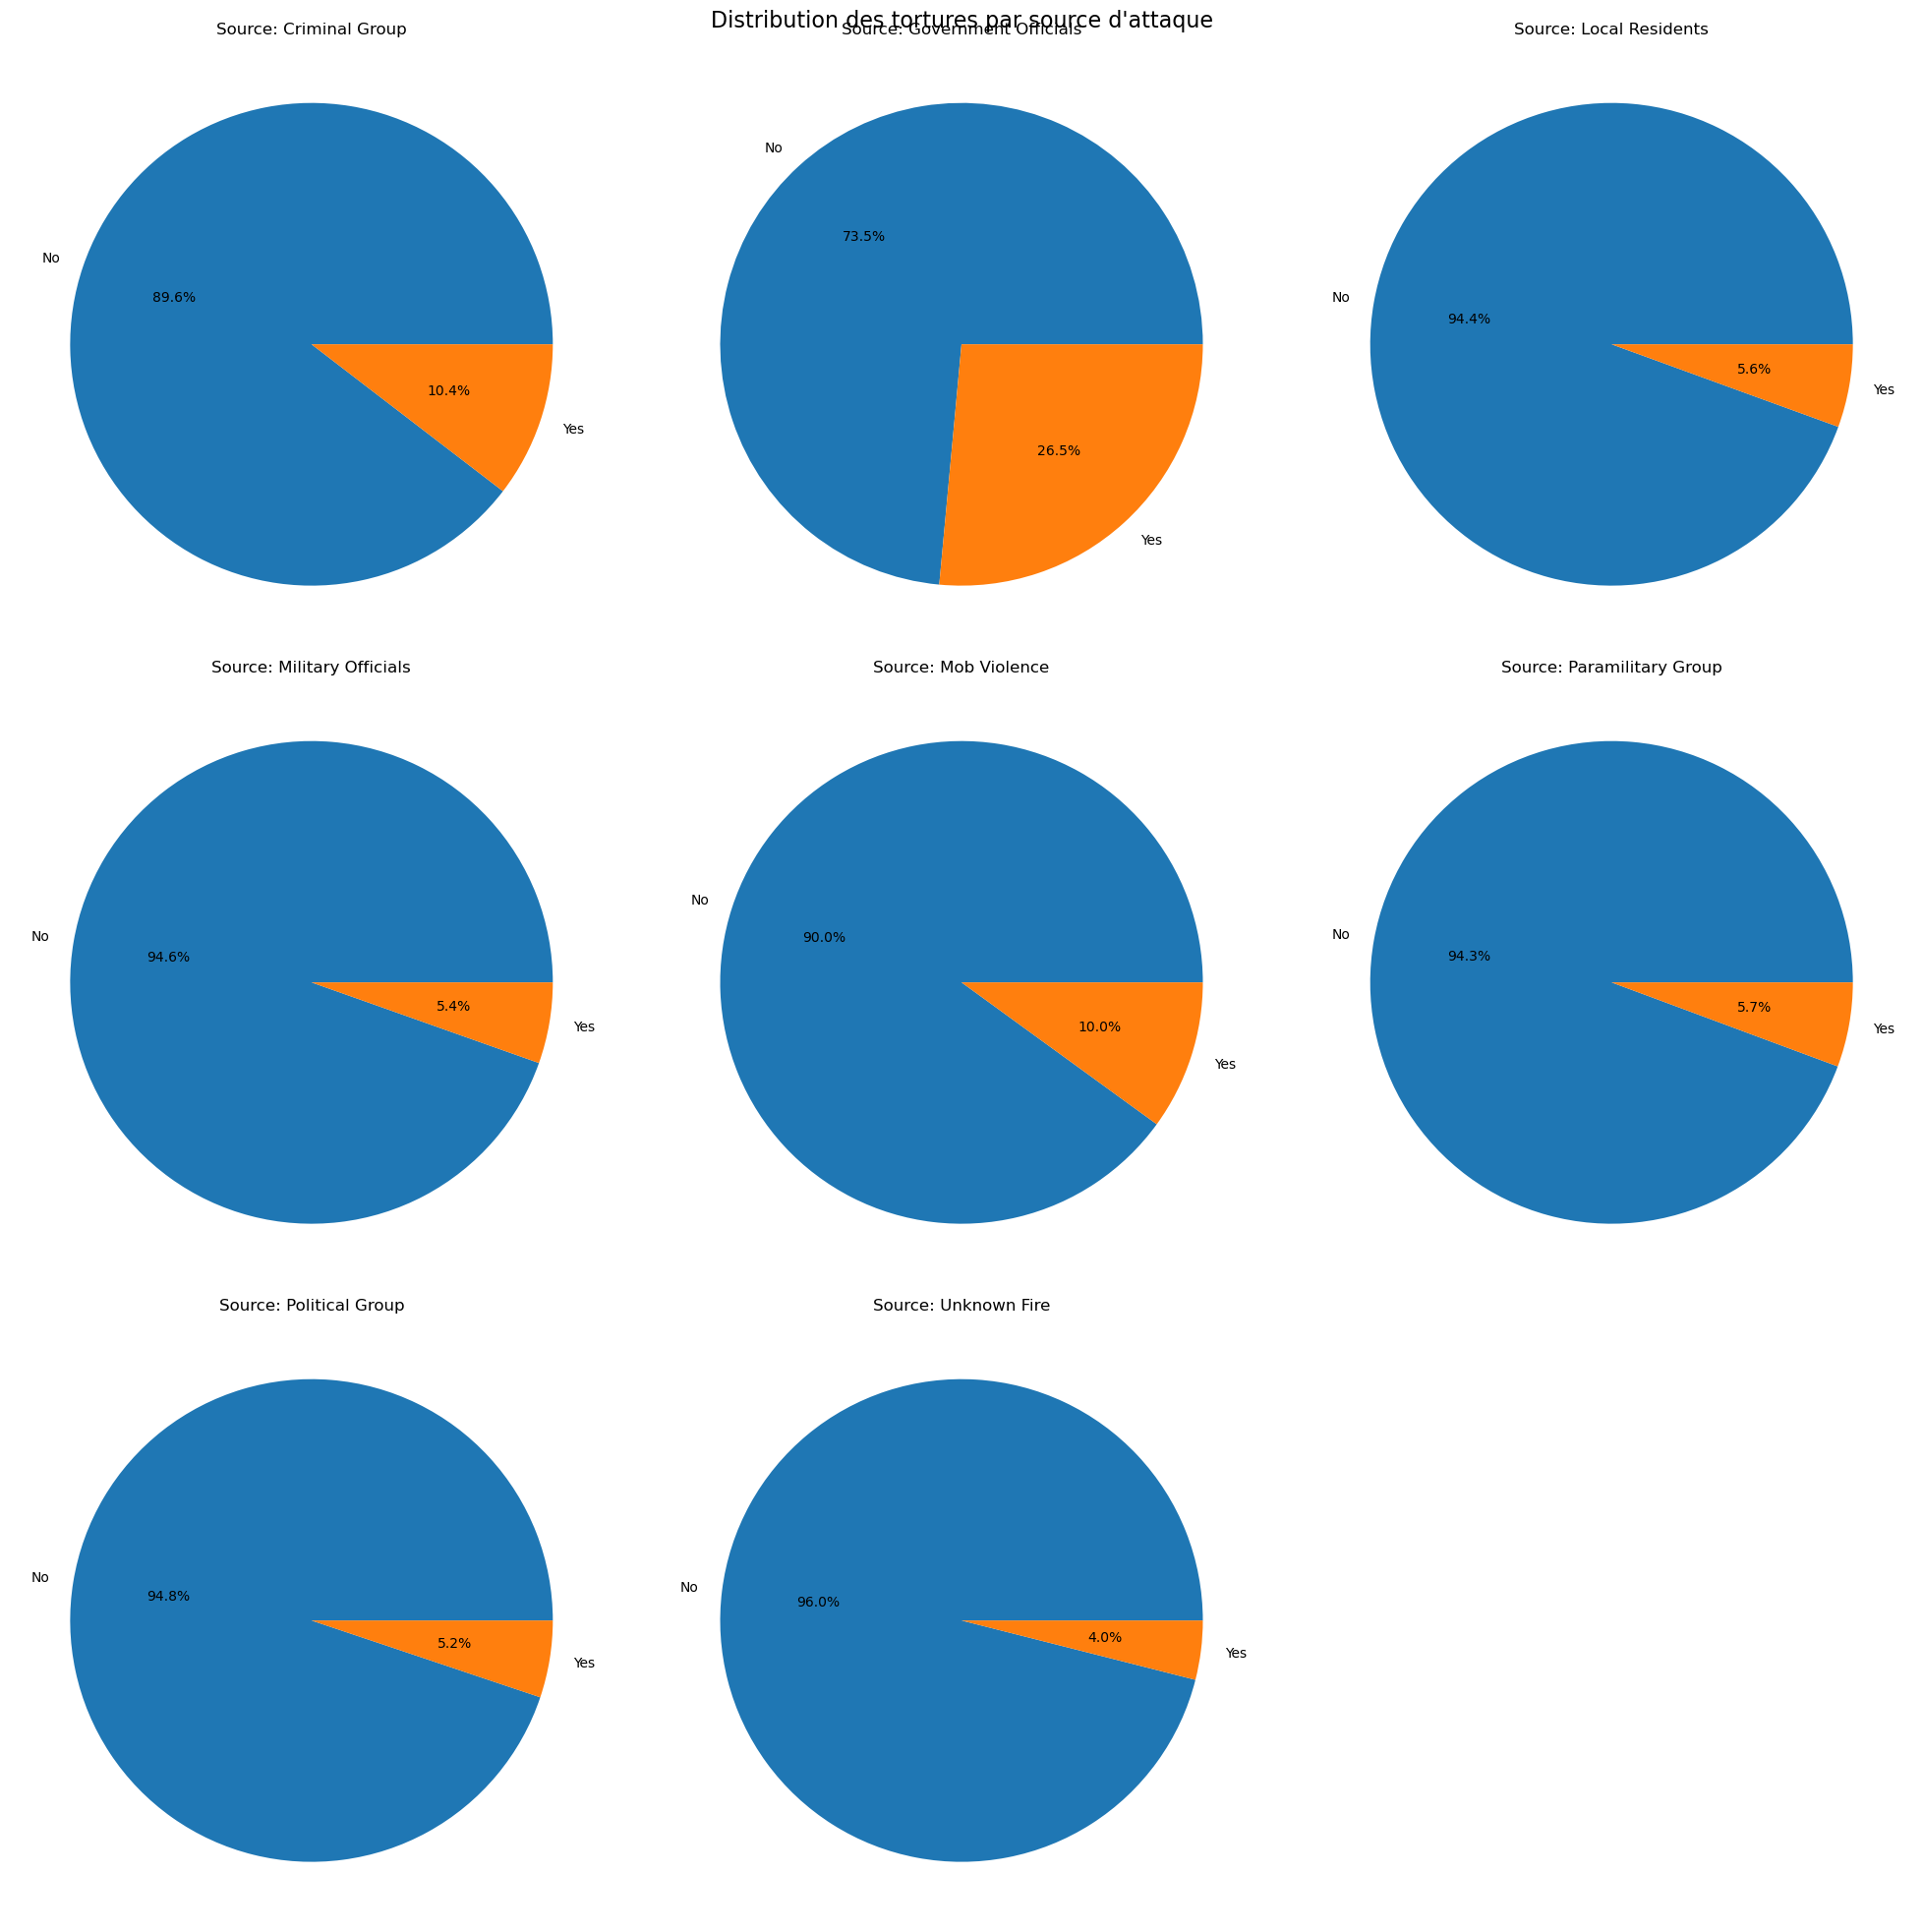

In [79]:
# Proportion de journalistes torturés. Colonne 'Tortured'
# Create pie chart for torture data
torture_data = df['Tortured'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(torture_data, labels=torture_data.index, autopct='%1.1f%%')
plt.title('Proportion de journalistes torturés')
plt.axis('equal')
plt.show()

# Faire ce même diagramme, pour chaque groupe distinct dans la colonne 'Source of Fire'
# Exclure les sources contenant une virgule
# Create figure with subplots for each source of fire
source_fire_torture = pd.crosstab(df['Source of Fire'], df['Tortured'])
source_fire_filtered = source_fire_torture[~source_fire_torture.index.str.contains(',')]

# Create a figure with subplots
num_sources = len(source_fire_filtered)
rows = int(np.ceil(np.sqrt(num_sources)))
cols = rows
fig, axes = plt.subplots(rows, cols, figsize=(20, 20))
axes = axes.ravel()

# Create pie charts for each source of fire
for idx, (source, data) in enumerate(source_fire_filtered.iterrows()):
    if idx < len(axes):
        axes[idx].pie(data, labels=['No', 'Yes'], autopct='%1.1f%%')
        axes[idx].set_title(f'Source: {source}')

# Remove empty subplots if any
for idx in range(len(source_fire_filtered), len(axes)):
    fig.delaxes(axes[idx])

plt.suptitle('Distribution des tortures par source d\'attaque', fontsize=16)
plt.tight_layout()
plt.show()

Une fois de plus, on constate que la tendance à la torture est plus élevée lorsque le meurtre est commis par des autorités gouvernementales, ce qui est une tendance également partagée par les groupes criminels et les violences de masse.